# Bonus part 2 - Create embedding with Keras

# Imports

In [1]:
import numpy as np
import pandas as pd
from sklearn.manifold import TSNE
import ast
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Prepare_data

In [3]:
movies = pd.read_csv('movies_embedding.csv', usecols = range(1,34))
titles = pd.read_csv('movie_titles.csv', usecols = [0,1,2],encoding = "ISO-8859-1", names = ['index', 'year', 'name'])
movies = titles.merge(movies, left_on = 'index', right_on = 'movie', how = 'inner')
genres = pd.read_csv('movie_genre.csv')
genres = genres.set_index('movie')['genres']

def get_first_genre(val):
    return ast.literal_eval(val)[0]
genre_dict = genres.apply(get_first_genre).to_dict()
movies['genre'] = movies['name'].map(genre_dict) 
movies['genre'] = movies['genre'].where(movies['genre'].isin(['Comedy','Action','Drama']), np.nan)      

# Plot t-SNE

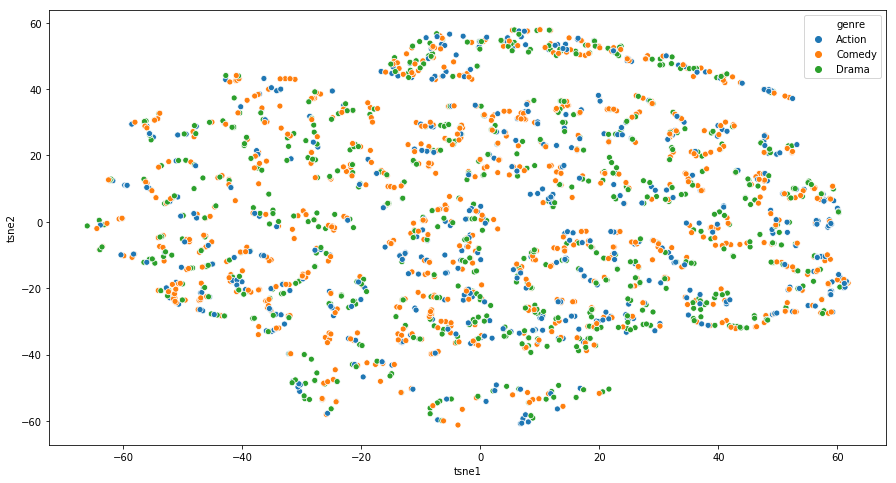

In [4]:
tsne_cols = [str(i) for i in range(32)]
tsne = TSNE(n_components=2, verbose= 0 , perplexity=10, n_iter=500)
tnse_results = tsne.fit_transform(movies[tsne_cols])
movies['tsne1'] = tnse_results[:,0]
movies['tsne2'] = tnse_results[:,1]
plt.figure(figsize=(15,8))
ax = sns.scatterplot(x='tsne1', y='tsne2' ,data = movies, hue = 'genre')
ax.set_title("t-SNE results: Movies Embedding")

# Plot PCA

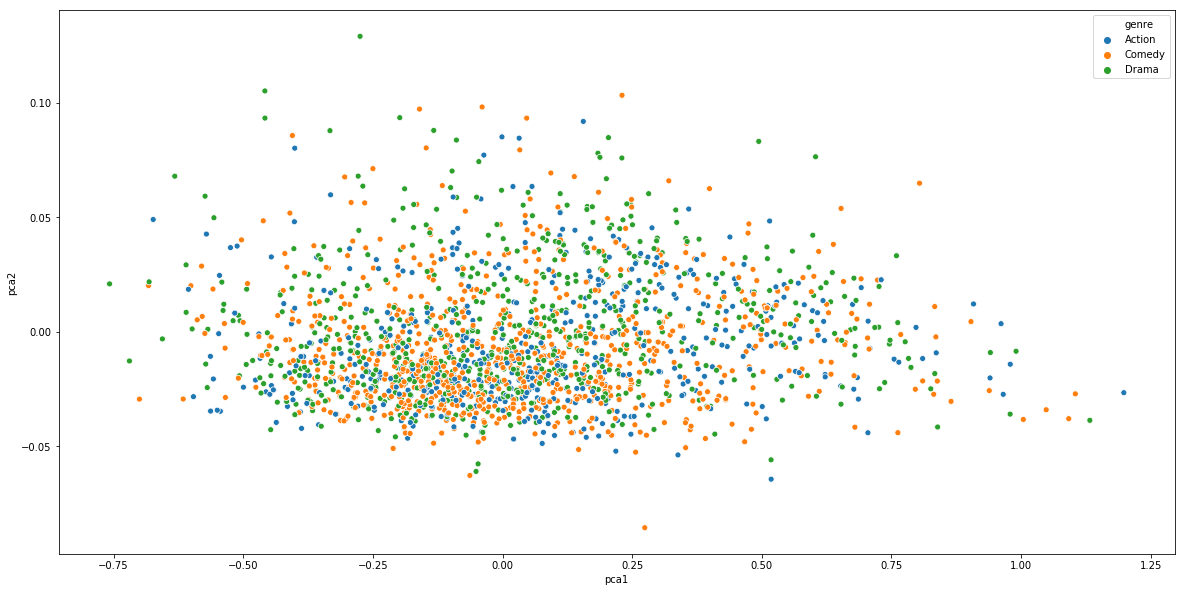

In [5]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca = pca.fit_transform(movies[tsne_cols])
movies['pca1'] = pca[:,0]
movies['pca2'] = pca[:,1]
plt.figure(figsize=(20,10))
sns.scatterplot(x='pca1', y='pca2' ,data = movies, hue = 'genre')